In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from utils import xml_to_df

%matplotlib inline
font = {'size'   : 14}
mpl.rc('font', **font)
pd.options.display.max_columns=999

# What are people talking about?

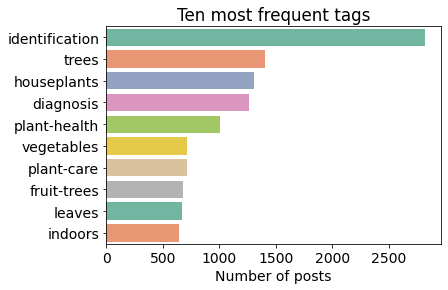

In [2]:
tags = xml_to_df("data/gardening.stackexchange.com/Tags.xml")
tags["Count"] = tags["Count"].astype(int)

# Bar plot of tags by count/frequency
sns.barplot(x="Count", y="TagName", 
            data=tags.sort_values("Count", ascending=False).iloc[:10],
            orient="h", palette="Set2")
plt.xlabel("Number of posts")
plt.ylabel("")
plt.title("Ten most frequent tags")
plt.show()

# Where are people posting from?

In [3]:
# Load & merge data
posts = xml_to_df("data/gardening.stackexchange.com/Posts.xml")
print(f"Loaded {len(posts)} posts.\n")

users = xml_to_df("data/gardening.stackexchange.com/Users.xml") \
    [["Id", "Location"]]
print(f"Loaded {len(users)} users.\n")

df = posts.merge(users, left_on= "OwnerUserId", right_on="Id", how="left")
print((f"Merged user locations onto posts, resulting in {len(df)} rows.\n"
       f"Correct number of merged rows: {len(posts) == len(df)}\n"))

questions = df[df.PostTypeId == "1"]
print(f"{len(questions)} posts are questions.\n")
answers = df[df.PostTypeId == "2"]
print(f"{len(answers)} posts are answers.\n")

Loaded 37884 posts.

Loaded 20869 users.

Merged user locations onto posts, resulting in 37884 rows.
Correct number of merged rows: True

15002 posts are questions.

22062 posts are answers.



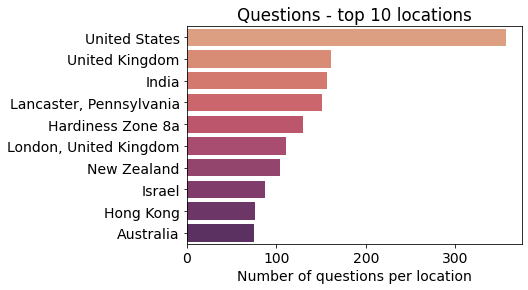

In [4]:
# Bar plot of questions by location frequency
question_counts = questions.Location.value_counts().reset_index() \
    .rename(columns={"index": "Location", "Location": "Count"}) \
    .sort_values("Count", ascending=False).iloc[:10]

sns.barplot(x="Count", y="Location", 
            data=question_counts,
            orient="h", palette="flare")
plt.xlabel("Number of questions per location")
plt.ylabel("")
plt.title("Questions - top 10 locations")
plt.show()


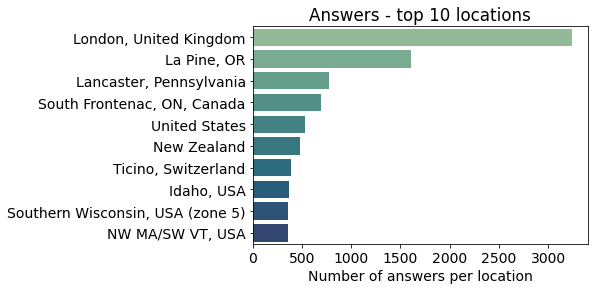

In [5]:
# Bar plot of answers by location frequency
answer_counts = answers.Location.value_counts().reset_index() \
    .rename(columns={"index": "Location", "Location": "Count"}) \
    .sort_values("Count", ascending=False).iloc[:10]

sns.barplot(x="Count", y="Location", 
            data=answer_counts,
            orient="h", palette="crest")
plt.xlabel("Number of answers per location")
plt.ylabel("")
plt.title("Answers - top 10 locations")
plt.show()


# How much conversation is there?

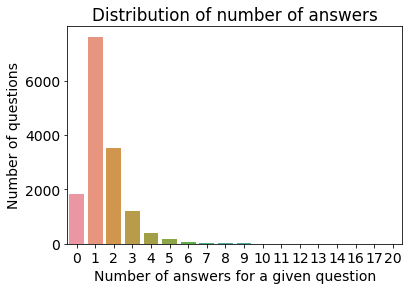

In [6]:
# Bar plot / histogram of answer counts
# Remove posts less than ~1 month old. Their answer counts may skew low.
answer_counts = questions[questions.CreationDate < "2021-02-01"] \
    .fillna(0).AnswerCount.astype(int).value_counts().reset_index() \
    .rename(columns={"index": "Number of answers", "AnswerCount": "Count"}) \
    .sort_values("Number of answers")

sns.barplot(x="Number of answers", y="Count", 
            data=answer_counts,
            orient="v")
plt.xlabel("Number of answers for a given question")
plt.ylabel("Number of questions")
plt.title("Distribution of number of answers")
plt.show()

In [7]:
answer_counts["Percent of posts"] = answer_counts["Count"] / answer_counts["Count"].sum()
answer_counts.head()

,Number of answers,Count,Percent of posts
2,0,1816,0.121961
0,1,7610,0.511081
1,2,3538,0.237609
3,3,1211,0.081330
4,4,386,0.025923
